In [1]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *

In [2]:
ii = 0

# Here, call surrogate model
surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\flexure_pd_010_just_good_data'
template_dir = os.path.join(surrogate_dir, 'templatedir_SIM')

surrogate_file = surrogate_dir + r'\SimGpModel.json'
# json_dir = template_dir + r'\scInput.json'
# result_file = template_dir + r'\ops.out'
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'


In [3]:
# load the merged_data.csv file
merged_data = pd.read_csv(surrogate_dir + r'\train_data.csv')

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]


merged_data

,eta1,kappa_k,kappa,sig,lam,mup,sigp,rsmax,n,alpha,...,gamma,name,PeakDrift,FailureType,ar,lrr,srr,alr,sdr,smr
0,1.268766,0.560342,0.989811,0.422157,0.508888,0.289958,0.655478,0.538570,6.108898,0.013199,...,1.921804,"BRI No. 2 (Japan), spbaa1",0.035949,Flexure,0.166667,0.375176,0.002801,0.104919,1.157143,0.217488
1,1.302573,0.664521,1.019830,0.295417,0.379802,0.197480,0.396008,0.541934,6.798783,0.010121,...,1.467695,"Vu et al. 1998, NH1",0.051059,Flexure,0.166667,0.293255,0.002958,0.148193,1.000000,0.310284
2,1.081939,1.690771,0.998811,0.344018,0.469761,0.716281,1.547362,0.550237,1.718216,0.008190,...,1.322453,"Saatcioglu and Baingo 1999, RC4",0.044438,Flexure,0.151976,0.152553,0.012636,0.418754,0.900000,0.213547
3,0.519748,1.073142,1.006206,0.373530,0.341981,0.334443,0.679440,0.983444,2.987563,0.000982,...,0.338498,"Arakawa et al. 1988, No. 16",0.035076,Flexure,0.611111,0.460800,0.007761,0.000000,0.480000,0.769404
4,0.707529,1.838275,1.049884,0.204735,0.383226,3.123346,2.097244,0.557611,5.624242,0.001463,...,0.383594,"Lehman et al. 1998, 415",0.073409,Flexure,0.125000,0.448760,0.006615,0.281132,0.750000,0.333087
5,1.478835,5.314510,0.976617,0.386420,0.748542,2.441889,0.314088,0.637786,1.198469,0.007345,...,1.376716,"Davey 1975, No. 3",0.035757,Flexure,0.285714,0.288749,0.001793,0.055613,0.600000,0.528389
6,1.960111,0.621526,0.952017,0.260403,0.484648,0.964714,0.806099,0.346722,5.716157,0.000358,...,0.723724,"NIST, Model N4",0.090024,Flexure,0.166667,0.344157,0.002569,0.096245,1.157143,0.216825
7,0.695294,0.626197,1.010386,0.563346,0.214474,1.070838,1.863670,0.951193,7.216170,0.005337,...,1.292739,"Graff, 2001,C8",0.096042,Flexure,0.212852,0.163271,0.006290,0.102899,1.181102,0.245207
8,0.733326,0.622361,1.013984,0.392674,0.543617,0.630620,0.564946,0.663239,1.749506,0.022987,...,0.849292,"Vu et al. 1998, NH6",0.096118,Flexure,0.502198,0.349048,0.006924,0.084865,0.712500,0.525142
9,1.875975,0.842865,1.010454,0.381268,0.626903,1.352073,0.434545,0.461726,2.131855,0.005374,...,1.913639,"Saatcioglu and Baingo 1999, RC2",0.074438,Flexure,0.151976,0.211228,0.017496,0.313413,0.900000,0.157475


Name not found
Name not found
Error
Error
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Error
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Error
Error
Error
Name not found
Error
Name not found
Error
Error
Error
Error
Name not found
Name not found
Name not found
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Error
Name not found
Name not found
Name not found
Error
Error
Name not found
Name no

 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_46464\2564608485.py:41: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


Error
Error
Error
Error
Error
Name not found
Name not found
Name not found
Error
Error
Name not found
Error
Name not found
Name not found
Error
Name not found
Error
Name not found
Error
Name not found
Name not found
Name not found
Error
Name not found
Name not found
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Error
Name not found
Error
Name not found
Name not found
Error
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found


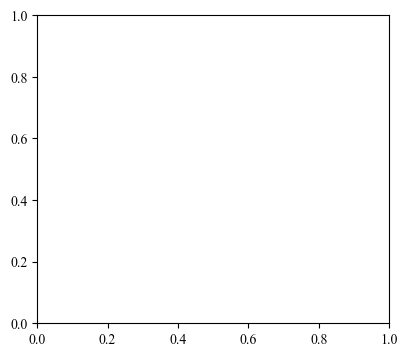

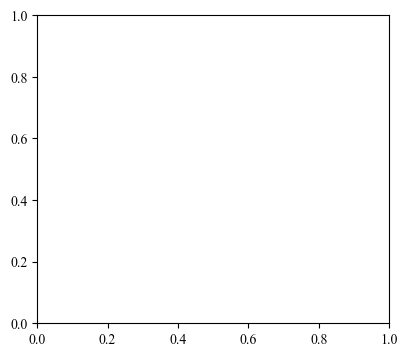

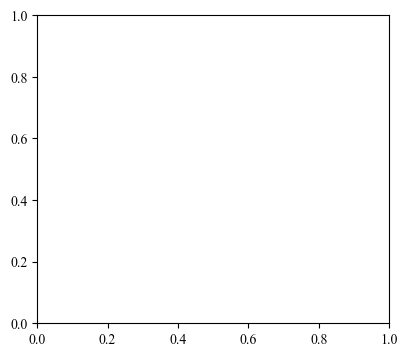

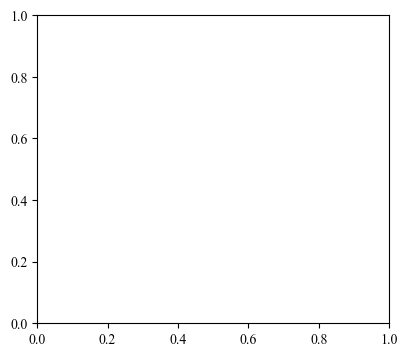

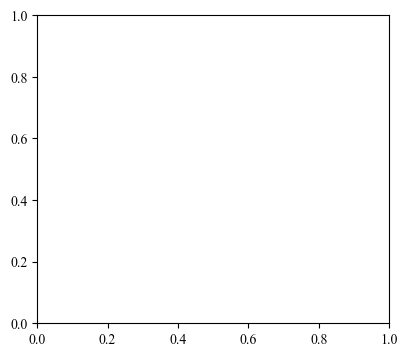

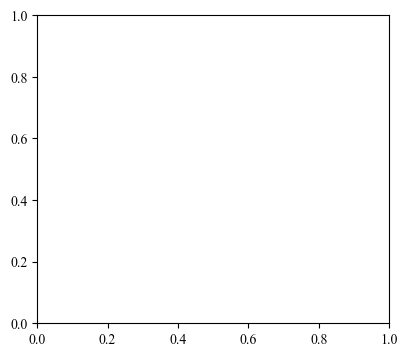

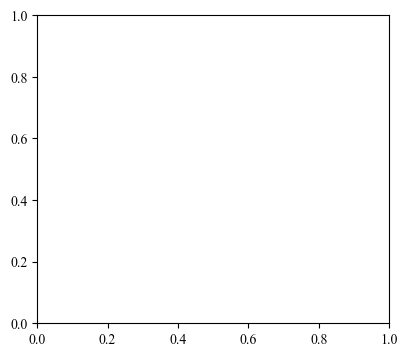

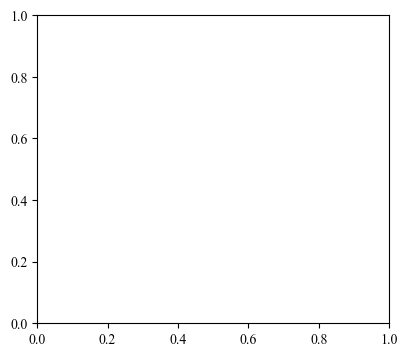

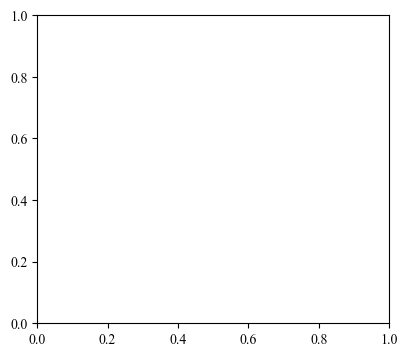

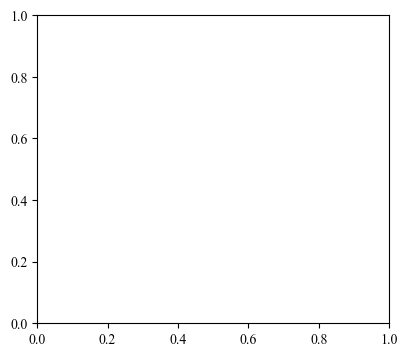

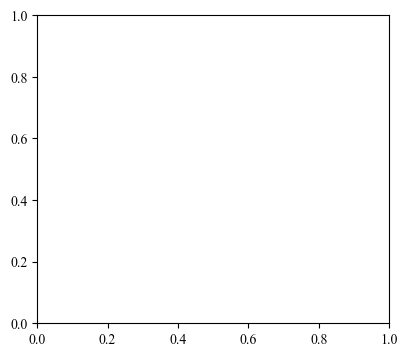

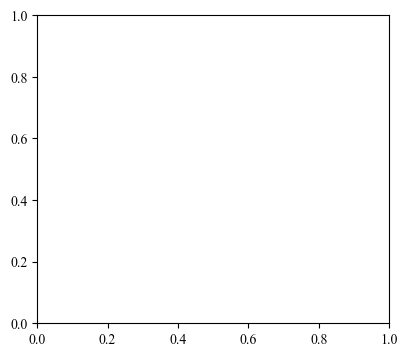

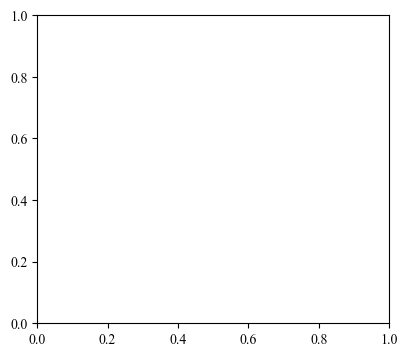

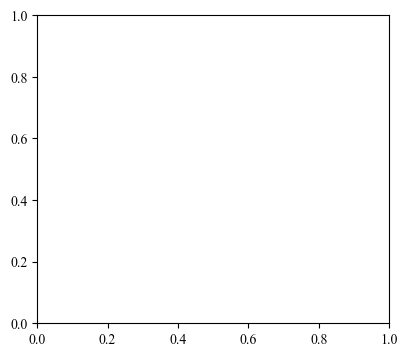

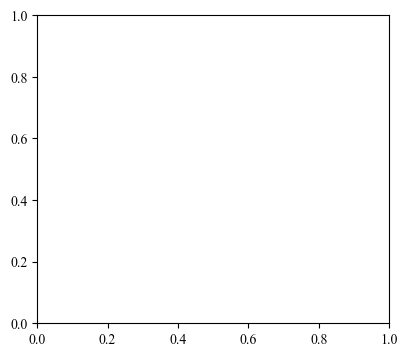

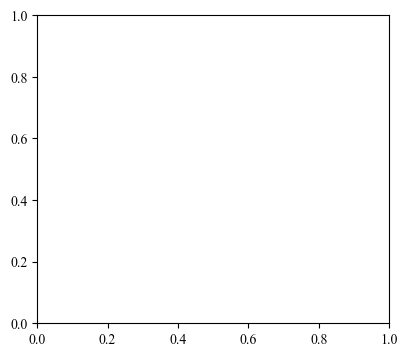

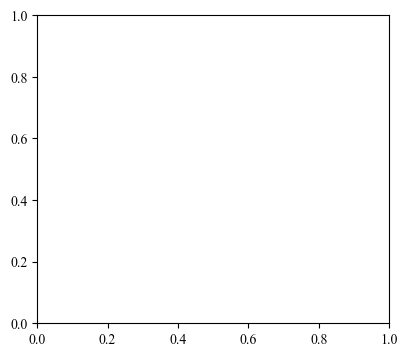

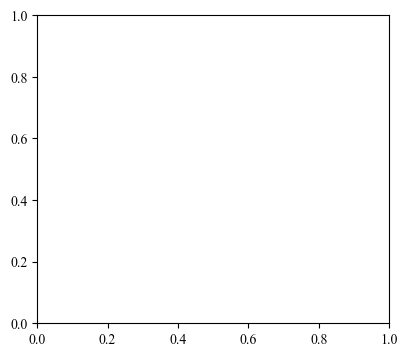

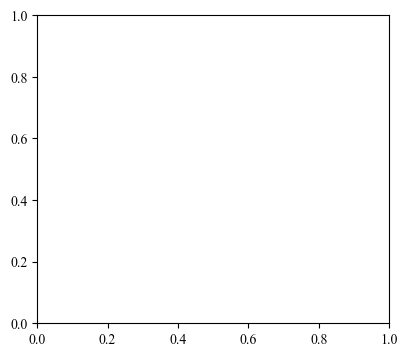

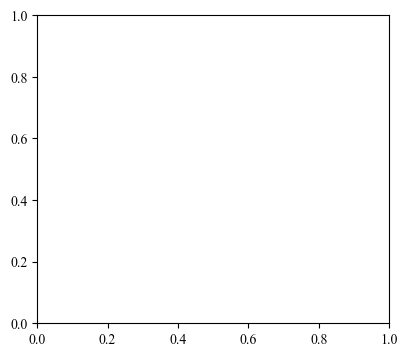

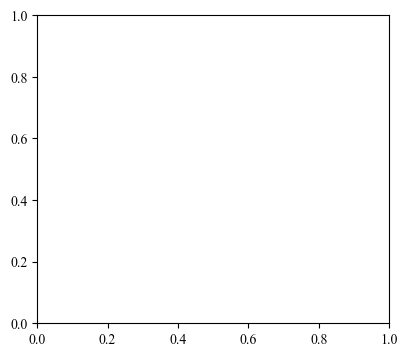

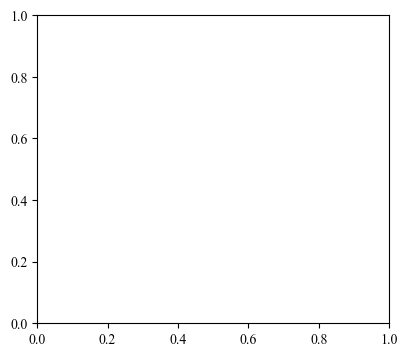

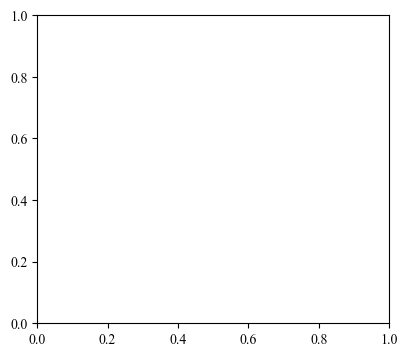

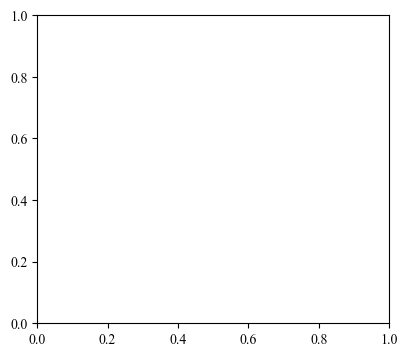

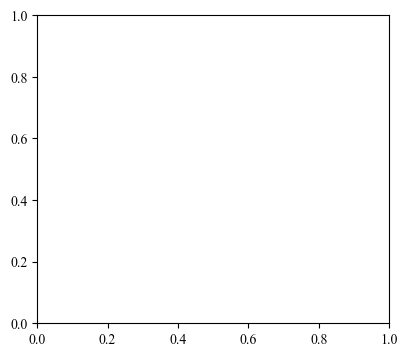

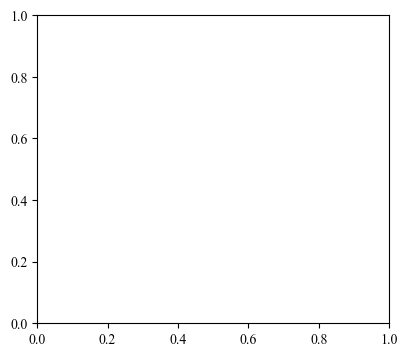

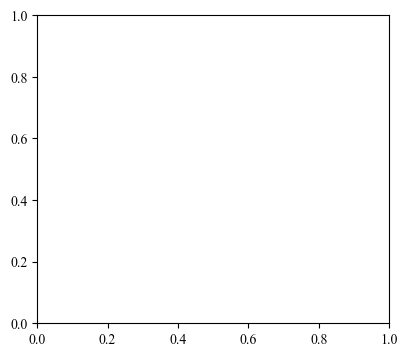

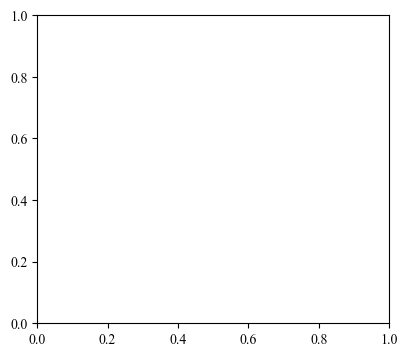

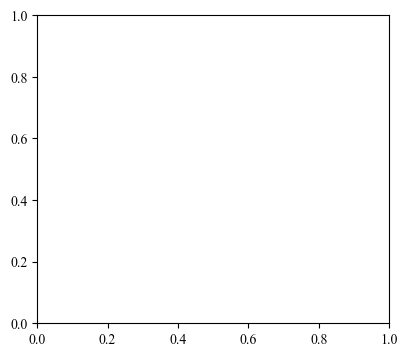

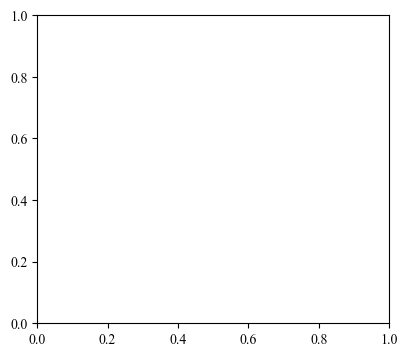

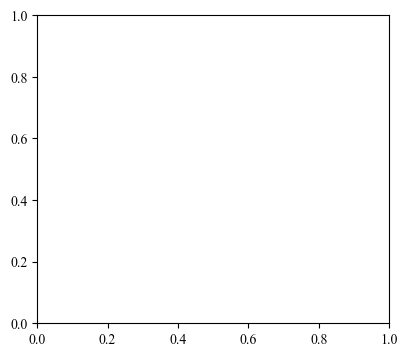

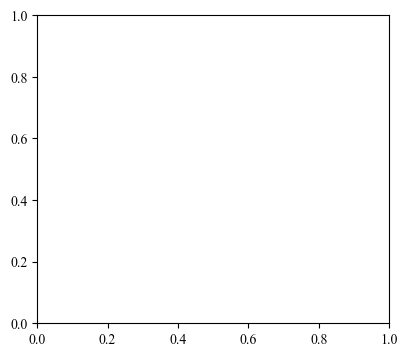

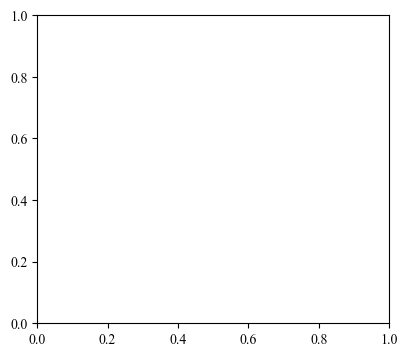

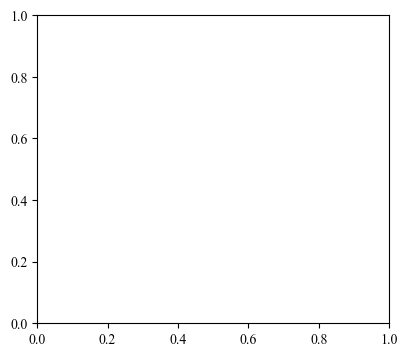

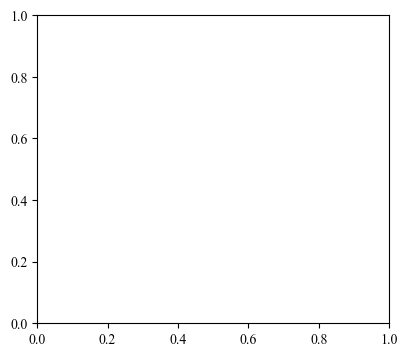

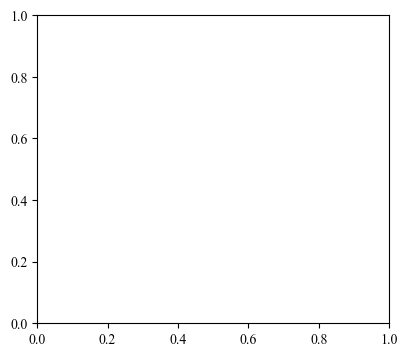

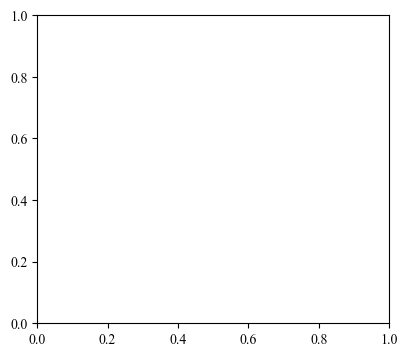

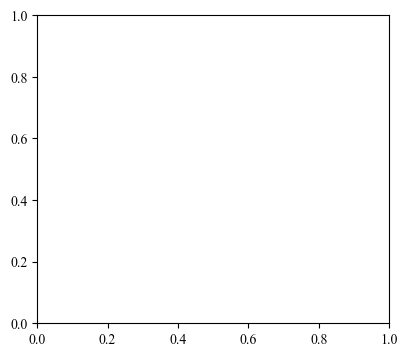

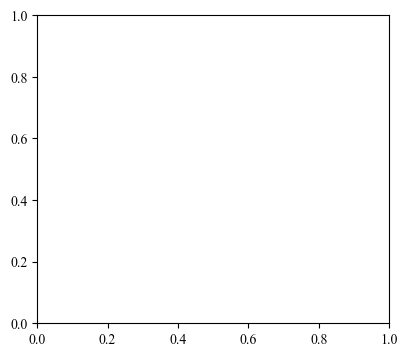

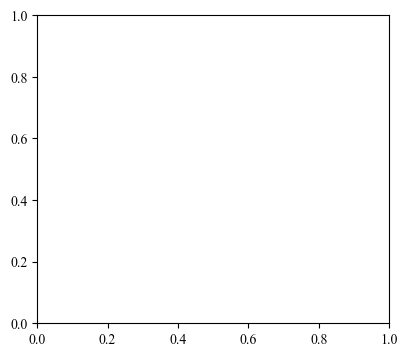

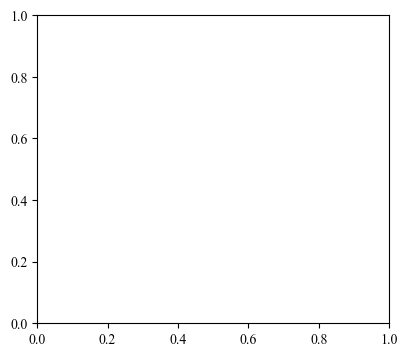

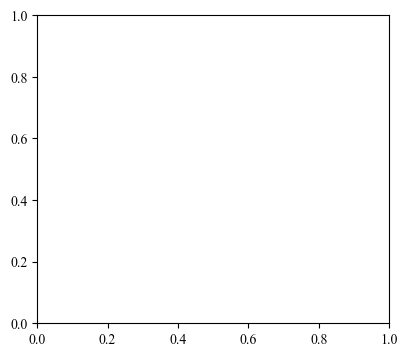

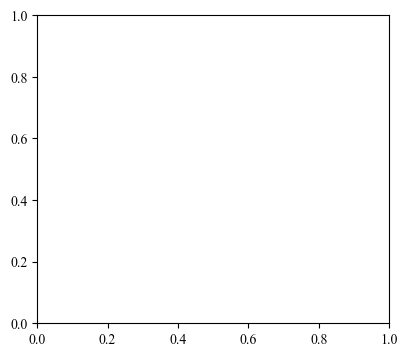

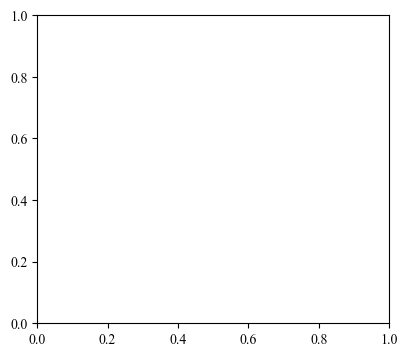

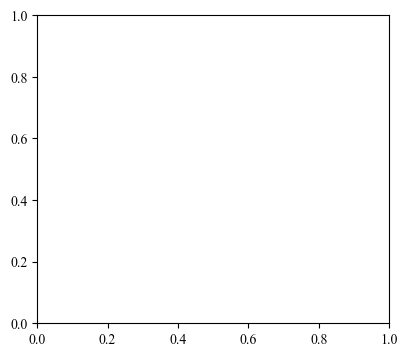

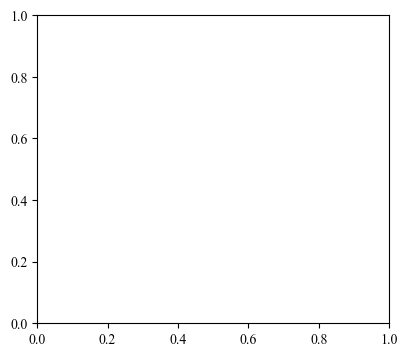

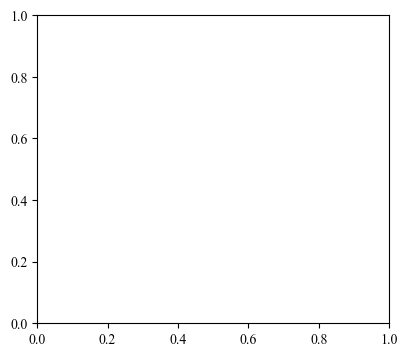

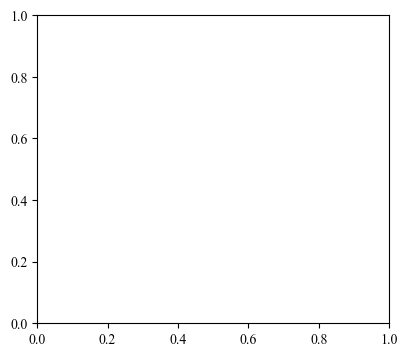

In [4]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
    except:
        print('Name not found')
        continue

    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    try:
        params, variance = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
        gp_predicted = []
            
        for vals in params[0]:
            gp_predicted.append(vals)
        
        # Run the model
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,1)
        run_model(cal_params, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])

        # Now, plot the surrogate predictions
        print(gp_predicted)
        plt.subplot(1,2,2)
        run_model(gp_predicted, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])
        plt.suptitle(test_data['Name'])
        plt.tight_layout()
        plt.show()
        # cc += 1
        print('\n')
    except:
        print('Error')
        continue
    